In [1]:
import pandas as pd
import numpy as np

from vega_datasets import data

# Working With Time Series Data

## San Francisco Temps Exercise 1

Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
# pull in data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
# set date as index and sort
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [5]:
# resample from hourly data to daily data
daily_mean = df.resample('D').mean()
daily_mean.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

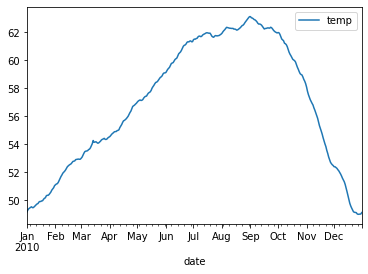

In [6]:
# visualize average temperature over time
daily_mean.plot()

## Exercise 2

Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

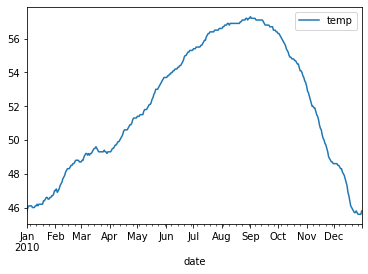

In [7]:
# resample from hourly data to daily data
daily_min = df.resample('D').min()

# visualize min temperature over time
daily_min.plot()

## Exercise 3

Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

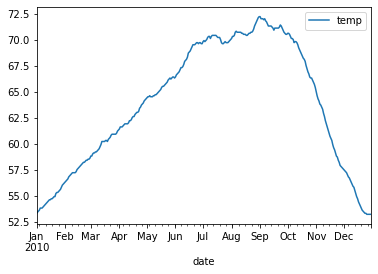

In [8]:
# resample from hourly data to daily data
daily_max = df.resample('D').max()

# visualize min temperature over time
daily_max.plot()

## Exercise 4

Which month is the coldest, on average?

In [9]:
# downsample from hourly to monthly data
monthly = df.resample('M').mean()

In [10]:
# create a month column
monthly['month'] = monthly.index.strftime('%B')
monthly.head()

,temp,month
date,,
2010-01-31,49.984140,January
2010-02-28,52.243899,February
2010-03-31,53.956528,March
2010-04-30,55.633056,April
2010-05-31,57.970968,May


In [11]:
# get month with min avg temp
monthly[monthly.temp == monthly.temp.min()]

,temp,month
date,,
2010-01-31,49.98414,January


## Exercise 5

Which month has the highest average temperature?

In [12]:
# get month with max avg temp
monthly[monthly.temp == monthly.temp.max()]

,temp,month
date,,
2010-09-30,62.487083,September


## Exercise 6

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [13]:
# downsample from hourly to daily data
daily_max = df.resample('D').max()
daily_min = df.resample('D').min()

In [14]:
# merge dataframes together
daily = daily_max.merge(daily_min, on='date')
daily.head()

,temp_x,temp_y
date,,
2010-01-01,53.3,45.8
2010-01-02,53.4,46.0
2010-01-03,53.5,46.1
2010-01-04,53.6,46.1
2010-01-05,53.8,46.1


In [15]:
# rename columns
daily = daily.rename(columns={'temp_x':'max', 'temp_y':'min'})
daily.head(2)

,max,min
date,,
2010-01-01,53.3,45.8
2010-01-02,53.4,46.0


In [16]:
# create a diff column that contains the temperature variance for the day
daily['diff'] = daily['max'] - daily['min']
daily.head(2)

,max,min,diff
date,,,
2010-01-01,53.3,45.8,7.5
2010-01-02,53.4,46.0,7.4


In [17]:
# downsample from daily to monthly data
monthly_avg = pd.DataFrame(daily.resample('M').diff.mean())
monthly_avg

,diff
date,
2010-01-31,8.341935
2010-02-28,9.485714
2010-03-31,10.854839
2010-04-30,12.320000
2010-05-31,12.909677
2010-06-30,13.950000
2010-07-31,13.977419
2010-08-31,13.870968
2010-09-30,14.403333


In [18]:
# assign a month column
monthly_avg['month'] = monthly_avg.index.strftime('%B')
monthly_avg.head(2)

,diff,month
date,,
2010-01-31,8.341935,January
2010-02-28,9.485714,February


In [19]:
# get month with highest daily temp variability
monthly_avg[monthly_avg['diff'] == monthly_avg['diff'].max()]

,diff,month
date,,
2010-09-30,14.403333,September


**Come back and look into code below for a simpler version. Try .transform to get the min and max**

In [20]:
# # assign a day column
# df['day'] = df.index.strftime('%j')
# df.head()

In [21]:
# # groupby day and get min and max temps
# df2 = df.groupby('day').temp.agg(['min', 'max'])
# df2.head()

In [22]:
# df2['difference'] = df2['max'] - df2['min']
# df2.head()

## Exercise 7

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [23]:
# check data
df.head(2)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4


In [26]:
# downsample from daily to monthly data
daily_results = df.resample('D').temp.agg(['min', 'mean', 'max'])
daily_results

,min,mean,max
date,,,
2010-01-01,45.8,49.170833,53.3
2010-01-02,46.0,49.304167,53.4
2010-01-03,46.1,49.391667,53.5
2010-01-04,46.1,49.445833,53.6
2010-01-05,46.1,49.491667,53.8
...,...,...,...
2010-12-27,45.6,48.991667,53.2
2010-12-28,45.6,49.000000,53.2
2010-12-29,45.6,49.012500,53.2


<AxesSubplot:xlabel='date'>

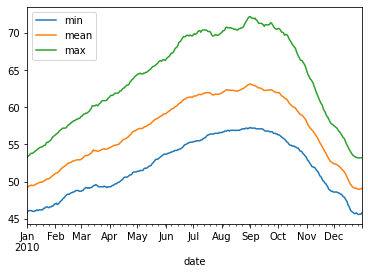

In [27]:
# plot results
daily_results.plot()

## Seattle Weather Exercise 1

Which year and month combination has the highest amount of precipitation?

In [29]:
from vega_datasets import data
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
